In [137]:
install geopandas

SyntaxError: invalid syntax (<ipython-input-137-c2cc48f1462b>, line 1)

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize'] = 15,8

import warnings
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'geopandas'

In [98]:
food = pd.read_csv('C:\\Users\\Nick\\Documents\\GitHub\\Indian_food_project\\raw_data\\indian_food.csv')

In [99]:
food.head(80)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East
...,...,...,...,...,...,...,...,...,...
75,Biryani,"Chicken thighs, basmati rice, star anise, swee...",non vegetarian,30,120,spicy,main course,Telangana,South
76,Butter chicken,"Chicken, greek yogurt, cream, garam masala pow...",non vegetarian,10,35,spicy,main course,NCT of Delhi,North
77,Chana masala,"Chickpeas, tomato paste, garam masala, ginger,...",vegetarian,20,30,spicy,main course,Punjab,North
78,Chapati,"Whole wheat flour, olive oil, hot water, all p...",vegetarian,10,10,-1,main course,Maharashtra,West


In [4]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


In [5]:
# change to UK spelling

food.rename(columns = {'flavor_profile':'flavour_profile'}, inplace = True)

In [6]:
# changing missing values from '-1' to NaN

food = food.replace(-1, np.nan)
food = food.replace('-1', np.nan)

In [7]:
# changing columns to be categorical 

food.diet = food.diet.astype('category')
food.flavour_profile = food.flavour_profile.astype('category')
food.course = food.course.astype('category')
food.state = food.state.astype('category')
food.region = food.region.astype('category')

---

Unique values of columns

In [8]:
# checking how many unique values there are in all columns 

food.nunique()

name               255
ingredients        252
diet                 2
prep_time           21
cook_time           18
flavour_profile      4
course               4
state               24
region               6
dtype: int64

In [9]:
food.course.value_counts()

main course    129
dessert         85
snack           39
starter          2
Name: course, dtype: int64

In [10]:
food.diet.value_counts()

vegetarian        226
non vegetarian     29
Name: diet, dtype: int64

In [11]:
food.flavour_profile.value_counts()

spicy     133
sweet      88
bitter      4
sour        1
Name: flavour_profile, dtype: int64

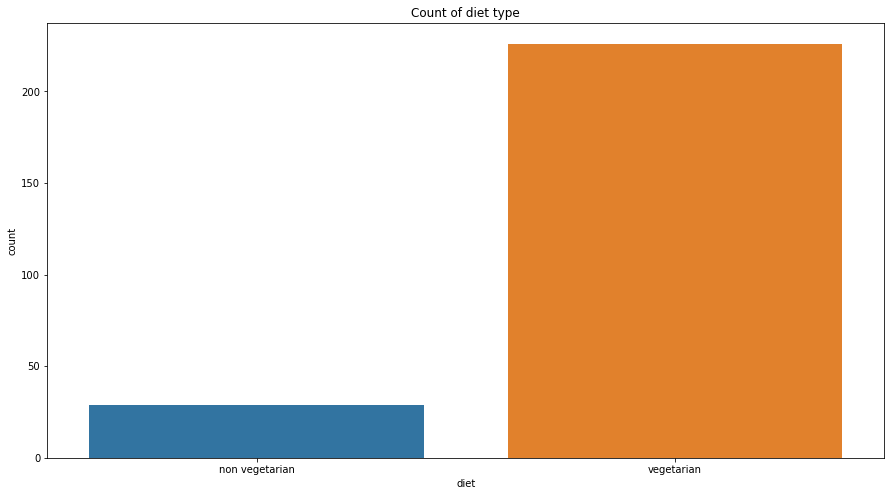

In [12]:
# Count of diet types

sns.countplot(food.diet)
plt.title('Count of diet type')
plt.show()

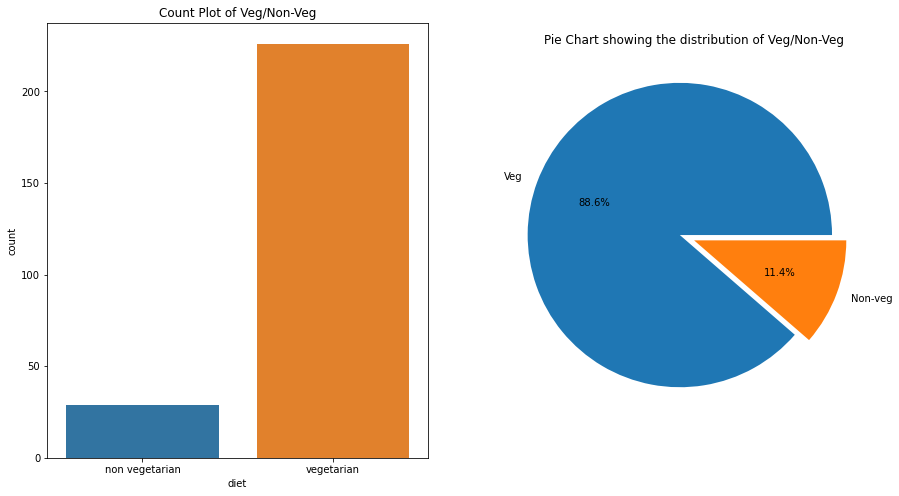

In [13]:
plt.subplot(1,2,1)
sns.countplot(food.diet)
plt.title("Count Plot of Veg/Non-Veg")

plt.subplot(1,2,2)
x = food.diet.value_counts()
explode = [0.1,0]
labels = ['Veg', 'Non-veg']
plt.pie(x, explode = explode, labels = labels, autopct = '%.1f%%')
plt.title("Pie Chart showing the distribution of Veg/Non-Veg")
plt.show()

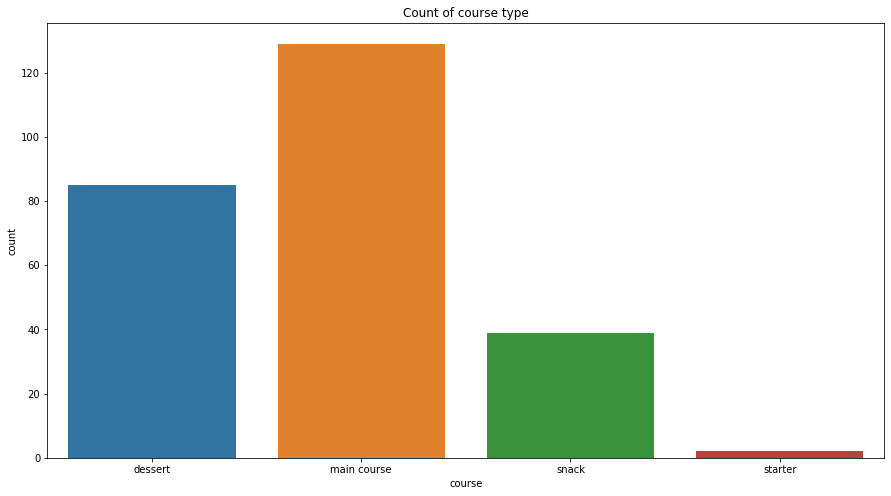

In [14]:
# count of course types

sns.countplot(food.course)
plt.title('Count of course type')
plt.show()

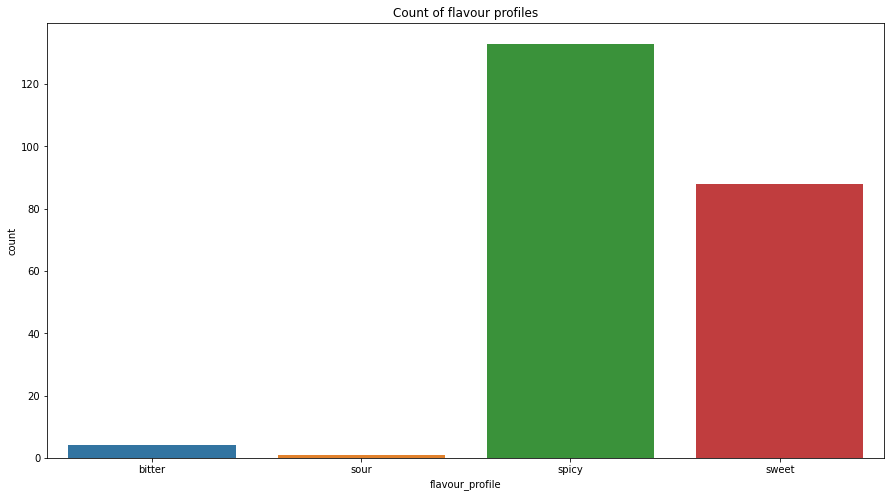

In [15]:
# count of flavour profile types

sns.countplot(food.flavour_profile)
plt.title('Count of flavour profiles')
plt.show()

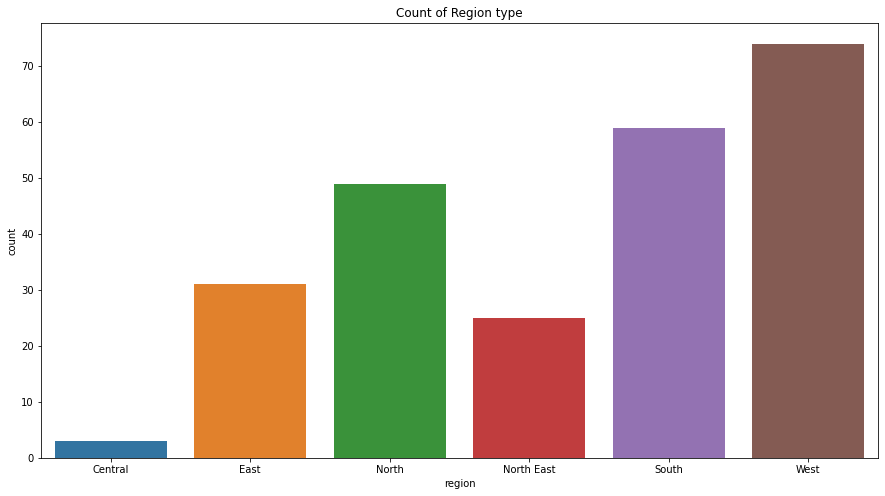

In [16]:
# count of region types

sns.countplot(food.region)
plt.title('Count of Region type')
plt.show()

In [17]:
region_diet = food.pivot_table(values = 'name', index = 'region', columns = 'diet', aggfunc = 'count')

In [18]:
region_diet

diet,non vegetarian,vegetarian
region,,
Central,NaN,3.0
East,5.0,26.0
North,5.0,44.0
North East,13.0,12.0
South,3.0,56.0
West,3.0,71.0


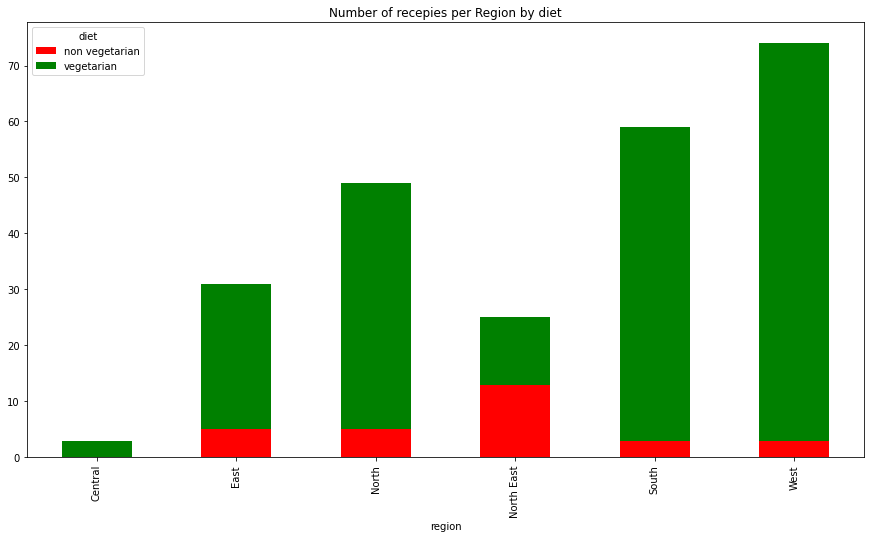

In [19]:
region_diet.plot(kind = 'bar', stacked = True, color = ['red', 'green'])
plt.title('Number of recepies per Region by diet')
plt.show()

In [20]:
region_course = food.pivot_table(values = 'name', index = 'region', columns = 'course', aggfunc = 'count')

In [21]:
region_course

course,dessert,main course,snack,starter
region,,,,
Central,1.0,1.0,1.0,NaN
East,21.0,10.0,NaN,NaN
North,9.0,37.0,1.0,2.0
North East,7.0,18.0,NaN,NaN
South,18.0,31.0,10.0,NaN
West,23.0,28.0,23.0,NaN


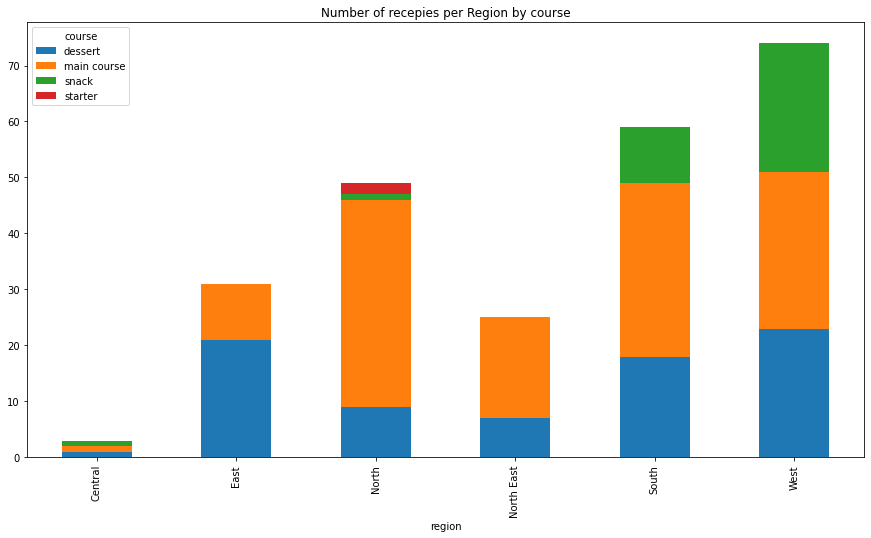

In [22]:
region_course.plot(kind = 'bar', stacked = True)
plt.title('Number of recepies per Region by course')
plt.show()

In [23]:
region_flavour = food.pivot_table(values = 'name', index = 'region', columns = 'flavour_profile', aggfunc = 'count')

In [24]:
region_flavour

flavour_profile,bitter,sour,spicy,sweet
region,,,,
Central,NaN,NaN,2.0,1.0
East,NaN,NaN,6.0,22.0
North,2.0,NaN,35.0,10.0
North East,NaN,NaN,13.0,7.0
South,NaN,NaN,30.0,19.0
West,2.0,1.0,41.0,23.0


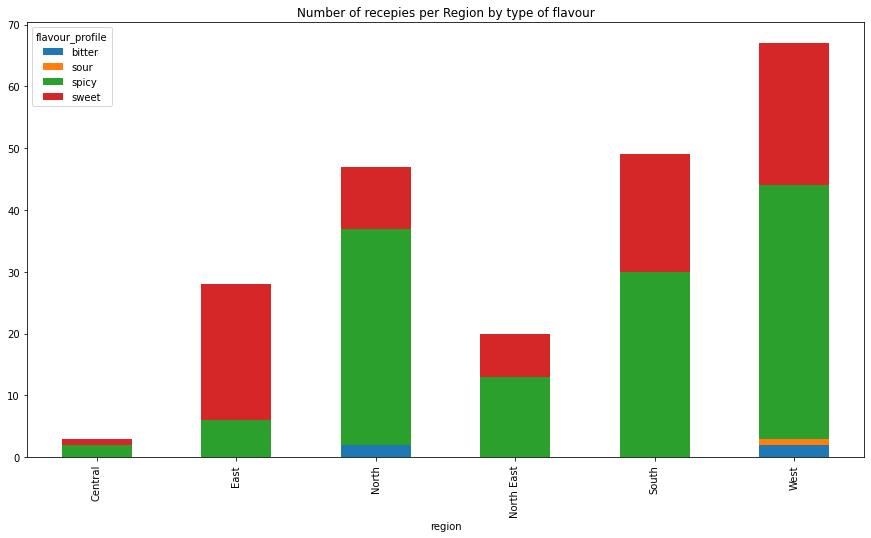

In [25]:
region_flavour.plot(kind = 'bar', stacked = True)
plt.title('Number of recepies per Region by type of flavour')
plt.show()

In [26]:
region_time_course = food.pivot_table(values = ['prep_time', 'cook_time'], index = 'course', aggfunc = np.mean)

In [27]:
region_time_course

,cook_time,prep_time
course,,
dessert,47.341772,29.961039
main course,35.272727,29.681818
snack,31.611111,56.388889
starter,37.500000,180.000000


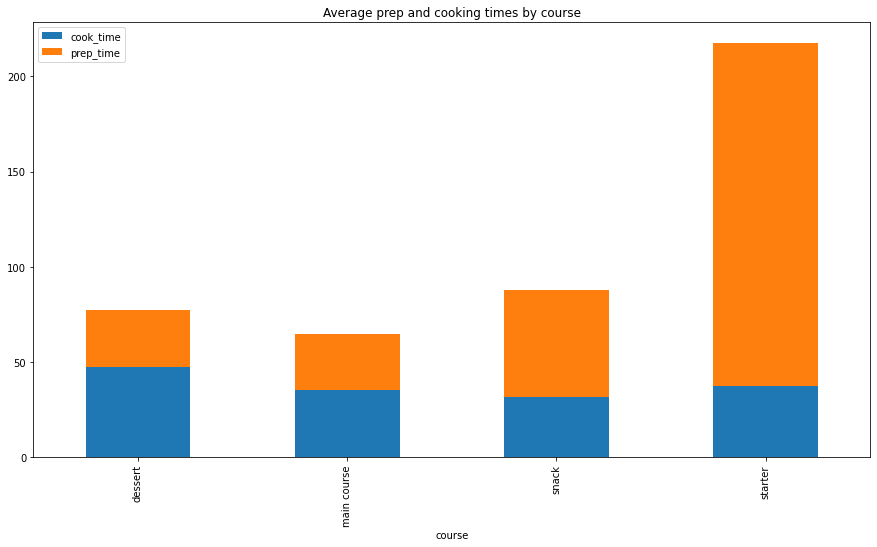

In [28]:
region_time_course.plot(kind = 'bar', stacked = True)
plt.title('Average prep and cooking times by course')
plt.show()

In [29]:
region_time_flavour = food.pivot_table(values = ['prep_time', 'cook_time'], index = 'flavour_profile', aggfunc = np.mean)

In [30]:
region_time_flavour

,cook_time,prep_time
flavour_profile,,
bitter,37.500000,15.000000
sour,10.000000,10.000000
spicy,35.543103,37.327586
sweet,47.439024,31.337500


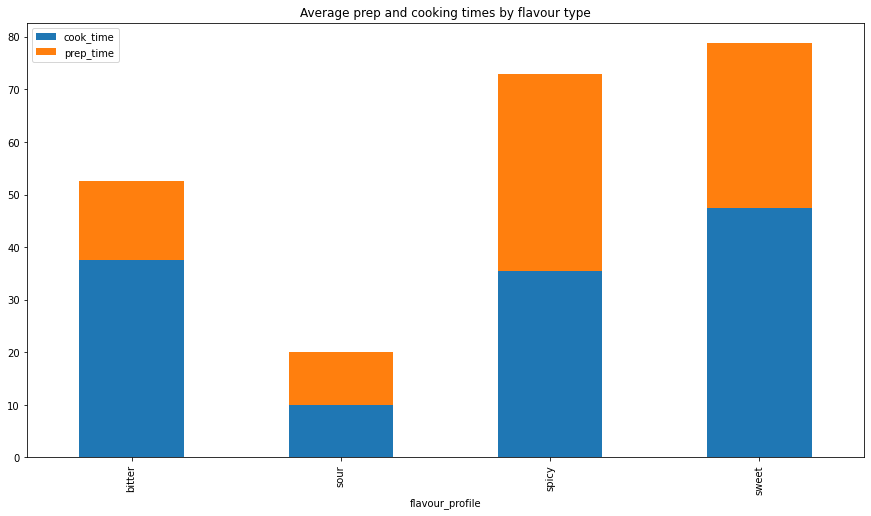

In [31]:
region_time_flavour.plot(kind = 'bar', stacked = True)
plt.title('Average prep and cooking times by flavour type')
plt.show()

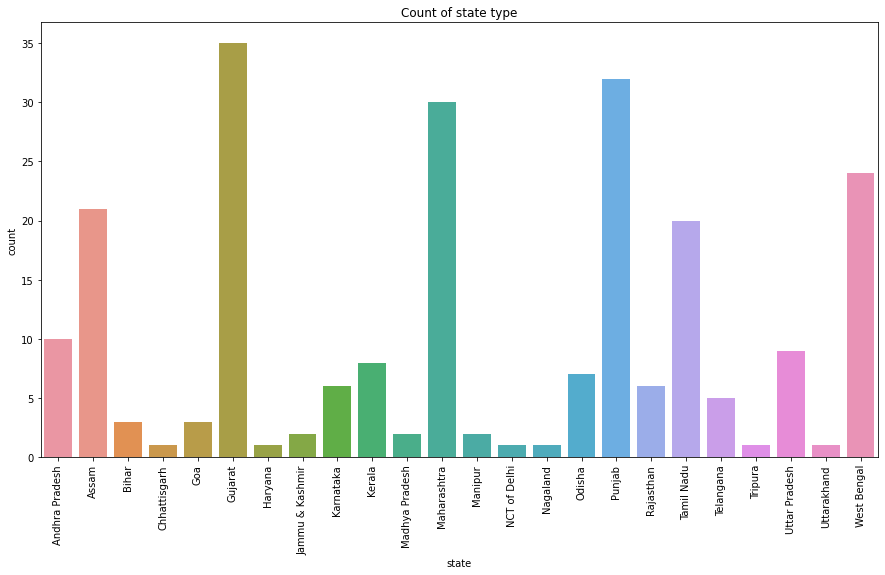

In [32]:
sns.countplot(food.state)
plt.xticks(rotation = 90)
plt.title('Count of state type')
plt.show()

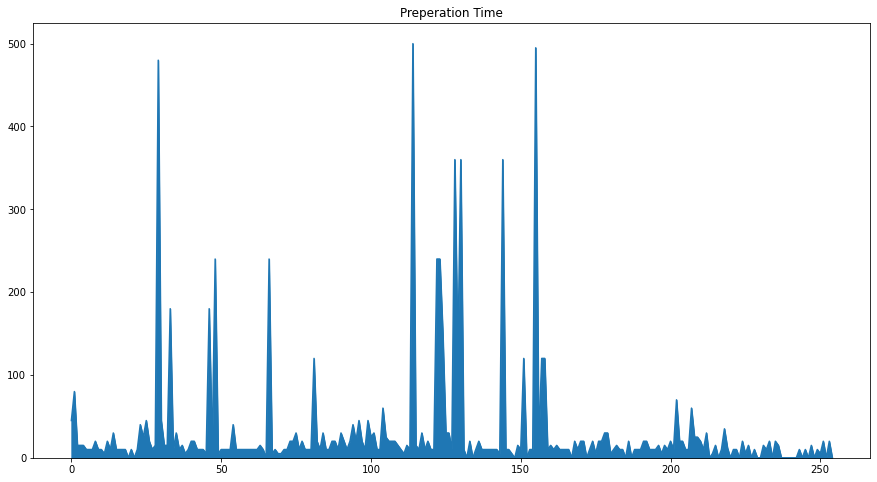

In [33]:
food.prep_time.plot(kind = 'area')
plt.title('Preperation Time')
plt.show()

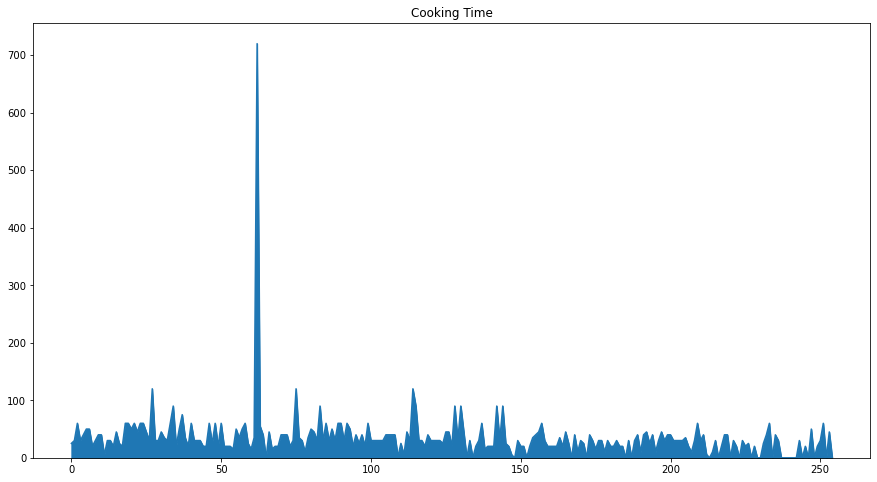

In [34]:
food.cook_time.plot(kind = 'area')
plt.title('Cooking Time')
plt.show()

In [35]:
pd.crosstab(food.state, food.diet).style.bar(color='gold')

diet,non vegetarian,vegetarian
state,,
Andhra Pradesh,0,10
Assam,10,11
Bihar,0,3
Chhattisgarh,0,1
Goa,1,2
Gujarat,0,35
Haryana,0,1
Jammu & Kashmir,0,2
Karnataka,0,6


In [36]:
pd.crosstab(food.flavour_profile, food.course).style.background_gradient(cmap='copper')

course,dessert,main course,snack,starter
flavour_profile,,,,
bitter,0,3,1,0
sour,0,1,0,0
spicy,0,96,35,2
sweet,85,3,0,0


In [37]:
pd.crosstab(food.course, food.diet).style.bar(color=['gold'])

diet,non vegetarian,vegetarian
course,,
dessert,0,85
main course,27,102
snack,0,39
starter,2,0


In [38]:
pd.crosstab(food.region, food.diet).style.bar(color=['gold'])

diet,non vegetarian,vegetarian
region,,
Central,0,3
East,5,26
North,5,44
North East,13,12
South,3,56
West,3,71


In [39]:
ingredients = set()
for item in food.ingredients:
    ingredients.update(str(item).lower().split(","))

In [40]:
len(ingredients)

425

In [41]:
def count_ingredient(column):
    return len(column.split(","))

In [42]:
food_count = food
food_count['ingredient_count'] = food_count.ingredients.apply(count_ingredient)
food_count

,name,ingredients,diet,prep_time,cook_time,flavour_profile,course,state,region,ingredient_count
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45.0,25.0,sweet,dessert,West Bengal,East,4
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80.0,30.0,sweet,dessert,Rajasthan,West,3
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15.0,60.0,sweet,dessert,Punjab,North,6
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15.0,30.0,sweet,dessert,Rajasthan,West,10
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15.0,40.0,sweet,dessert,West Bengal,East,8
...,...,...,...,...,...,...,...,...,...,...
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5.0,30.0,sweet,dessert,Assam,North East,3
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20.0,60.0,sweet,dessert,Goa,West,4
252,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,NaN,NaN,sweet,dessert,Jammu & Kashmir,North,5
253,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,20.0,45.0,sweet,dessert,Madhya Pradesh,Central,4


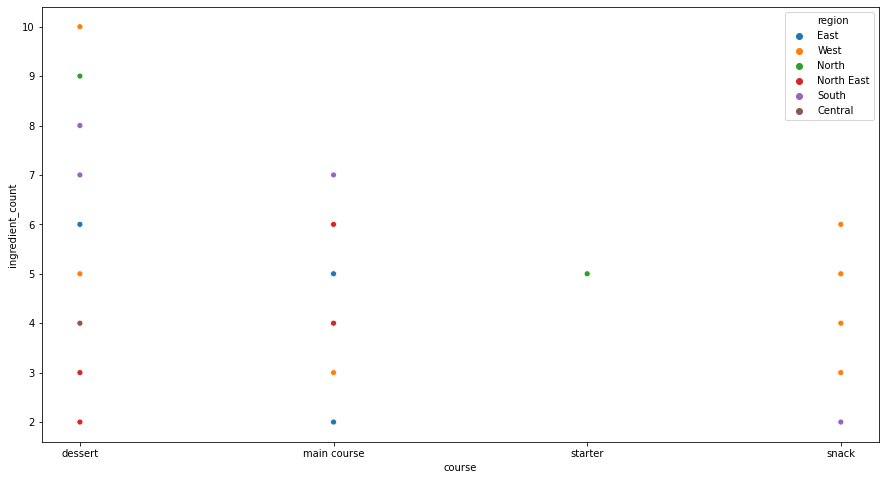

In [43]:
sns.scatterplot(data = food_count, x = 'course', y = 'ingredient_count', hue = 'region')

In [44]:
region_ingredient_count = food_count.pivot_table(values = 'ingredient_count', index = 'region', aggfunc = np.mean)

In [45]:
region_ingredient_count

,ingredient_count
region,
Central,4.333333
East,3.935484
North,4.918367
North East,4.480000
South,4.322034
West,4.445946


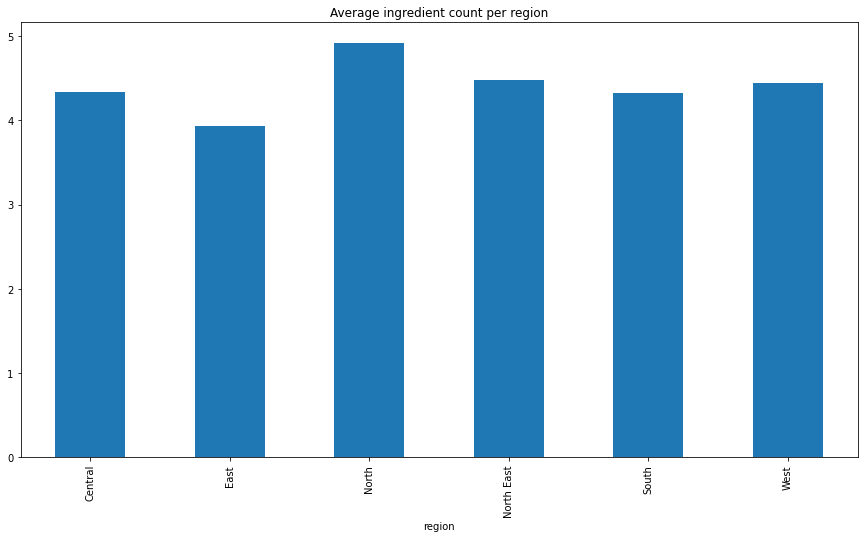

In [54]:
region_ingredient_count.plot(kind = 'bar', legend = False)
plt.title('Average ingredient count per region')
plt.show()

In [49]:
course_ingredient_count = food_count.pivot_table(values = 'ingredient_count', index = 'course', aggfunc = np.mean)

In [50]:
course_ingredient_count

,ingredient_count
course,
dessert,3.858824
main course,4.782946
snack,4.641026
starter,5.000000


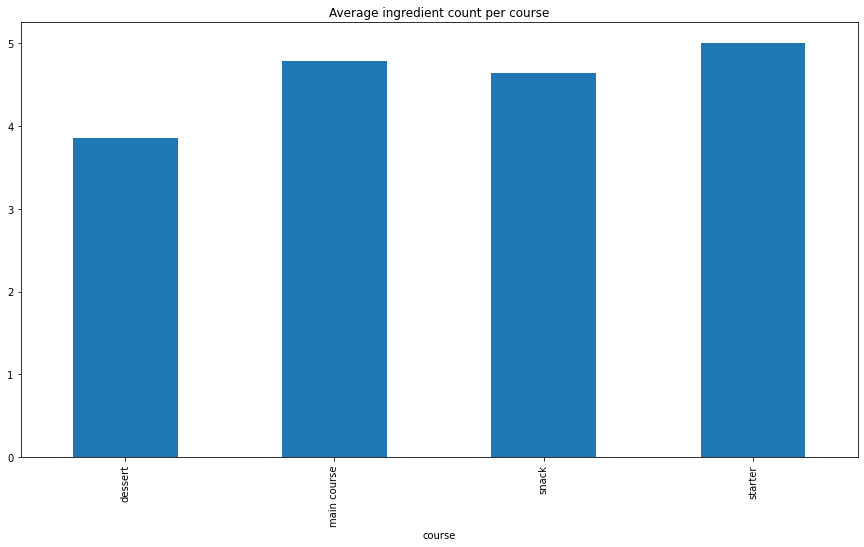

In [55]:
course_ingredient_count.plot(kind = 'bar', legend = False)
plt.title('Average ingredient count per course')
plt.show()

In [56]:
diet_ingredient_count = food_count.pivot_table(values = 'ingredient_count', index = 'diet', aggfunc = np.mean)
diet_ingredient_count

,ingredient_count
diet,
non vegetarian,5.137931
vegetarian,4.367257


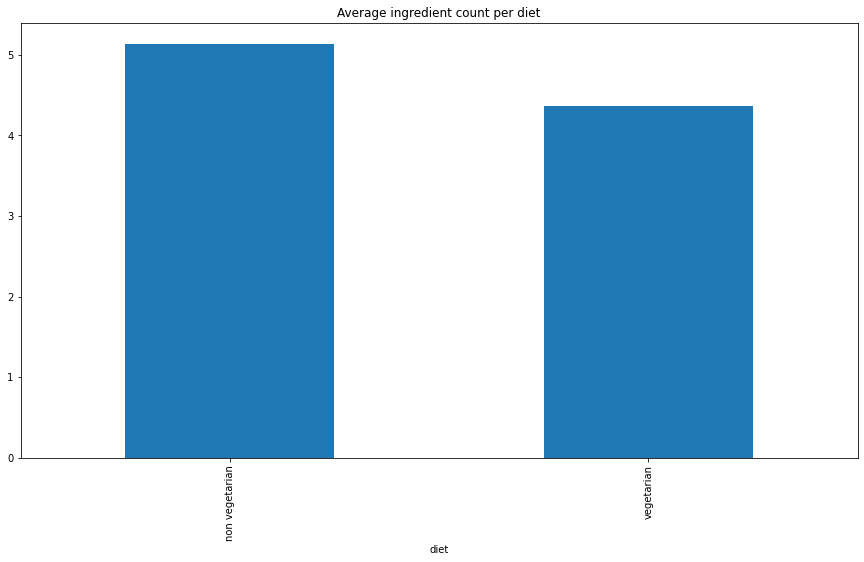

In [133]:
diet_ingredient_count.plot(kind = 'bar', legend = False)
plt.title('Average ingredient count per diet')
plt.show()

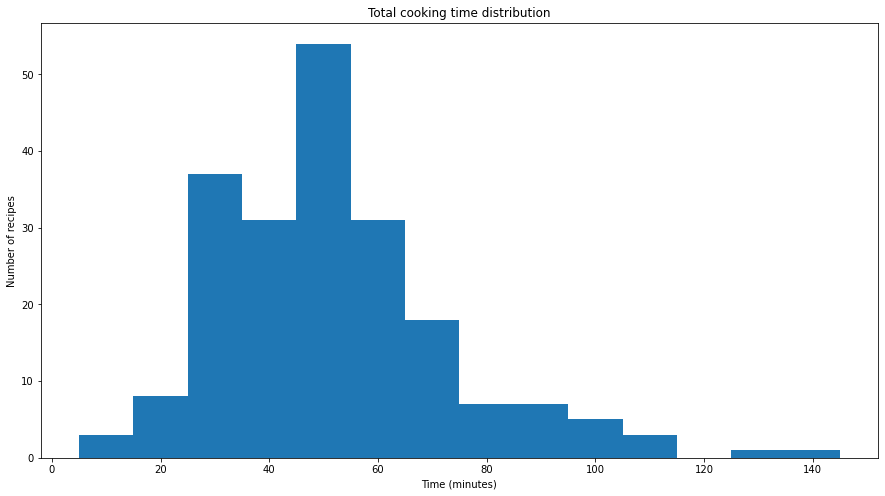

In [91]:
total_time = (food.prep_time + food.cook_time).to_frame('total_time').reset_index()
plt.hist(total_time.total_time, np.arange(5, 150, 10))
plt.title('Total cooking time distribution')
plt.xlabel('Time (minutes)')
plt.ylabel('Number of recipes')
plt.show()

In [102]:
ingredients = []
for a in food.ingredients.str.lower().values.tolist():
    for b in a.split(','):
        ingredients.append(b.strip())

In [103]:
pd.value_counts(ingredients)

sugar                48
ginger               29
garam masala         27
urad dal             25
curry leaves         25
                     ..
sliced almonds        1
bell pepper           1
ginger and garlic     1
pumpkin flowers       1
capsicum              1
Length: 365, dtype: int64

In [104]:
ingredient_top10 = pd.value_counts(ingredients)[:10]

In [105]:
ingredient_top10

sugar           48
ginger          29
garam masala    27
urad dal        25
curry leaves    25
ghee            25
jaggery         21
milk            21
rice flour      21
chana dal       16
dtype: int64

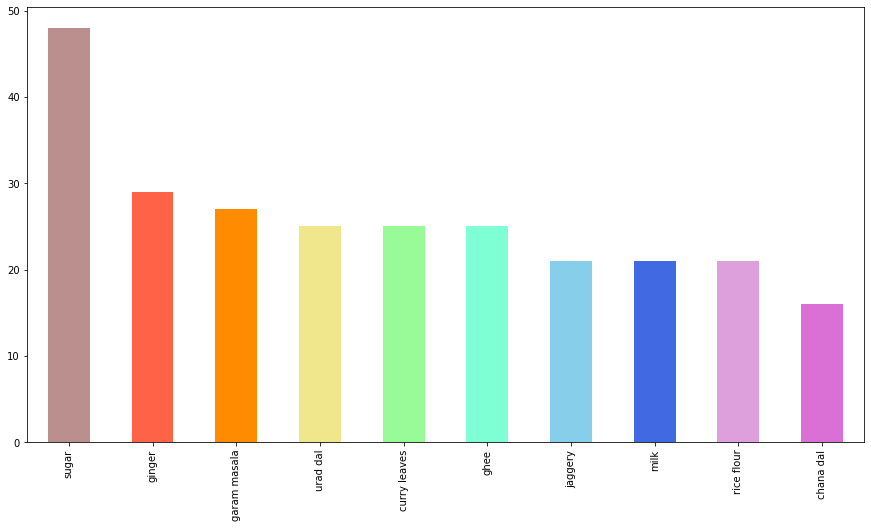

In [135]:
ingredient_top10.plot(kind = 'bar', color = ['rosybrown', 'tomato', 'darkorange', 'khaki', 'palegreen', \
                                            'aquamarine', 'skyblue', 'royalblue', 'plum', 'orchid'])

In [139]:
def country_plot(meal):
    india = gpd.read_file('C:\\Users\\Nick\\Documents\\GitHub\\Indian_food_project\\raw_data\\Indian_states.shp')
    course = food.course == meal
    course_selected = course.state.value_counts().reset_index()
    course.columns = ['state','count']
    merged = india.set_index('st_nm').join(course_selected.set_index('state'))
    f, ax = plt.subplots(1, figsize=(10, 10))
    ax.axis('off')
    ax.set_title('State-wise Distribution of Indian Sweets',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
    f = merged.plot(column='count', cmap='Wistia', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

In [140]:
country_plot('dessert')

NameError: name 'gpd' is not defined

In [141]:
india = gpd.read_file('C:\\Users\\Nick\\Documents\\GitHub\\Indian_food_project\\raw_data\\Indian_states.shp')

NameError: name 'gpd' is not defined